**Clustered Bar Charts** can be used to show the relationship between two qualittative variables. Instead of plotting the second variable on the y-axis, it plots both variables as bars in the x axis, with one variable being the color. The y-axis is usually the frequency but it can also be a quantitative third variable.

# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%config InlineBackend.figure_format = 'retina'

# Load Dataset

In [2]:
df = pd.read_csv('fuel-econ.csv')

## Converting `VClass` column to a categorical column

In [4]:
sedan_classes = ['Minicompact Cars', 'Subcompact Cars', 'Compact Cars', 'Midsize Cars', 'Large Cars']

vclasses = pd.CategoricalDtype(ordered=True, categories=sedan_classes)
df['VClass'] = df['VClass'].astype(vclasses);

## Adding a new column for transmission types

Transmissions can be automatic or manual

In [5]:
df['trans_type'] = df['trans'].apply(lambda x: x.split()[0])

In [7]:
df.head()

,id,make,model,year,VClass,drive,trans,fuelType,cylinders,displ,...,pv4,city,UCity,highway,UHighway,comb,co2,feScore,ghgScore,trans_type
0,32204,Nissan,GT-R,2013,Subcompact Cars,All-Wheel Drive,Automatic (AM6),Premium Gasoline,6,3.8,...,0,16.4596,20.2988,22.5568,30.1798,18.7389,471,4,4,Automatic
1,32205,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (AM-S6),Premium Gasoline,4,2.0,...,0,21.8706,26.9770,31.0367,42.4936,25.2227,349,6,6,Automatic
2,32206,Volkswagen,CC,2013,Compact Cars,Front-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,17.4935,21.2000,26.5716,35.1000,20.6716,429,5,5,Automatic
3,32207,Volkswagen,CC 4motion,2013,Compact Cars,All-Wheel Drive,Automatic (S6),Premium Gasoline,6,3.6,...,0,16.9415,20.5000,25.2190,33.5000,19.8774,446,5,5,Automatic
4,32208,Chevrolet,Malibu eAssist,2013,Midsize Cars,Front-Wheel Drive,Automatic (S6),Regular Gasoline,4,2.4,...,95,24.7726,31.9796,35.5340,51.8816,28.6813,310,8,8,Automatic


# Example 1: Bar Chart Between two Qualitative Variables

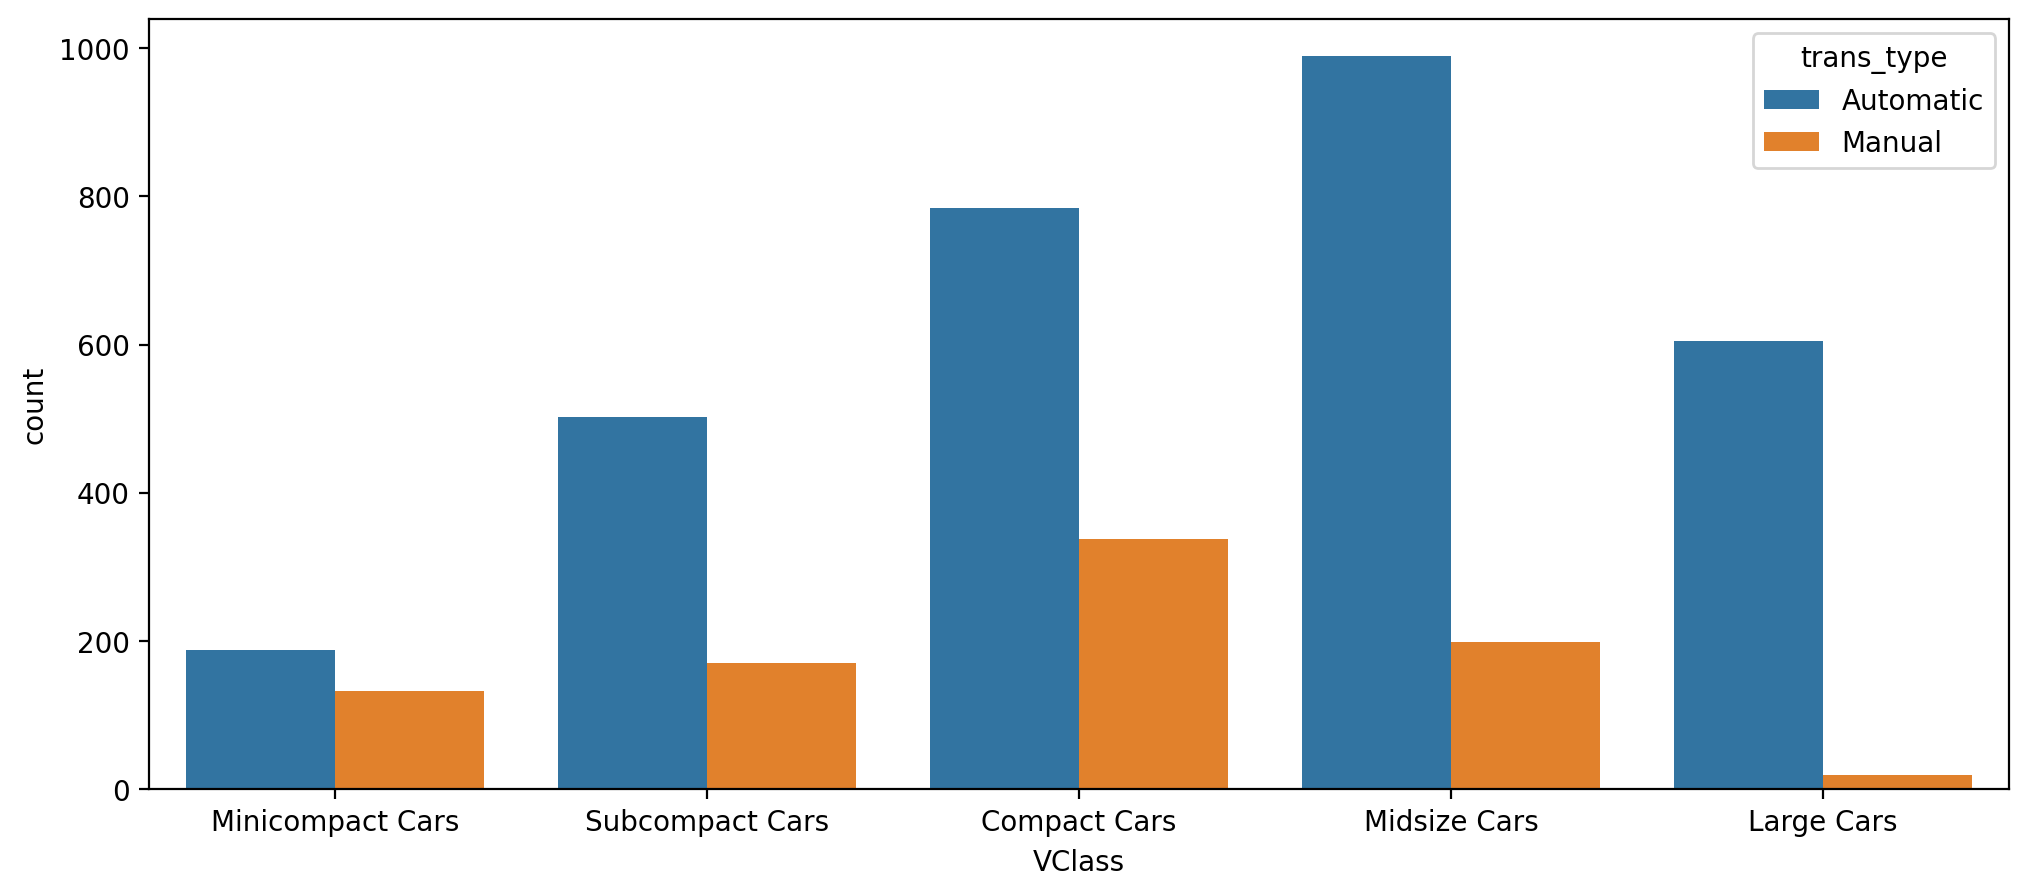

In [9]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, x='VClass', hue='trans_type');

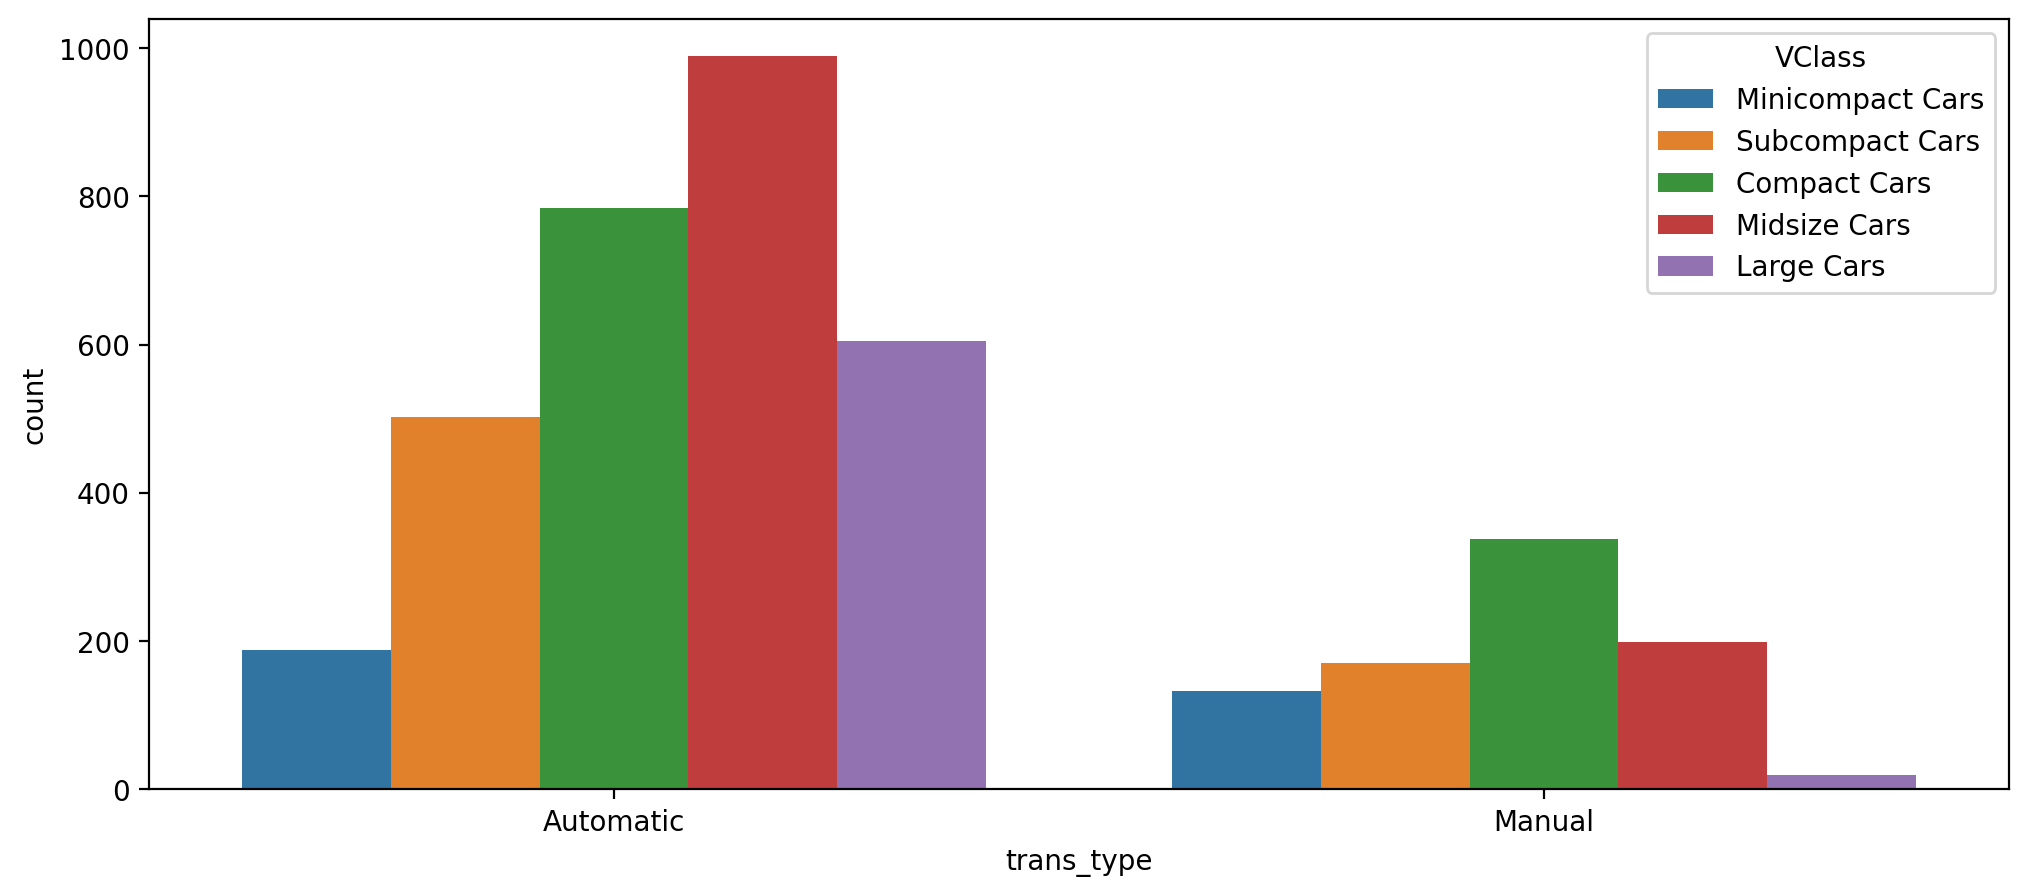

In [23]:
plt.figure(figsize=(12,5))
sns.countplot(data=df, hue='VClass', x='trans_type');

# Example 2: Plotting a Heat Map with two Qualitative Variables

An alternative way to compare two qualitative variables is to use seaborn's `heatmap()`. This version of the heat map is a 2D version of a bar chart instead of a 2D histogram. In order to pass the information to seaborn's `heatmap()`, it must have some transformations applied to it so that it becomes a summary of counts in a matrix.

## Getting the Desirable Format

In [26]:
ct_counts = df.groupby(['VClass', 'trans_type'],observed=False).size()
ct_counts

VClass            trans_type
Minicompact Cars  Automatic     188
                  Manual        133
Subcompact Cars   Automatic     502
                  Manual        171
Compact Cars      Automatic     784
                  Manual        338
Midsize Cars      Automatic     989
                  Manual        199
Large Cars        Automatic     605
                  Manual         20
dtype: int64

In [27]:
ct_counts = ct_counts.reset_index(name='count')
ct_counts

,VClass,trans_type,count
0,Minicompact Cars,Automatic,188
1,Minicompact Cars,Manual,133
2,Subcompact Cars,Automatic,502
3,Subcompact Cars,Manual,171
4,Compact Cars,Automatic,784
5,Compact Cars,Manual,338
6,Midsize Cars,Automatic,989
7,Midsize Cars,Manual,199
8,Large Cars,Automatic,605
9,Large Cars,Manual,20


In [20]:
ct_counts = ct_counts.pivot(index='VClass', columns='trans_type', values='count')
ct_counts

trans_type,Automatic,Manual
VClass,,
Minicompact Cars,188,133
Subcompact Cars,502,171
Compact Cars,784,338
Midsize Cars,989,199
Large Cars,605,20


This is how the final form of the matrix should look like

## Plotting the Heatmap

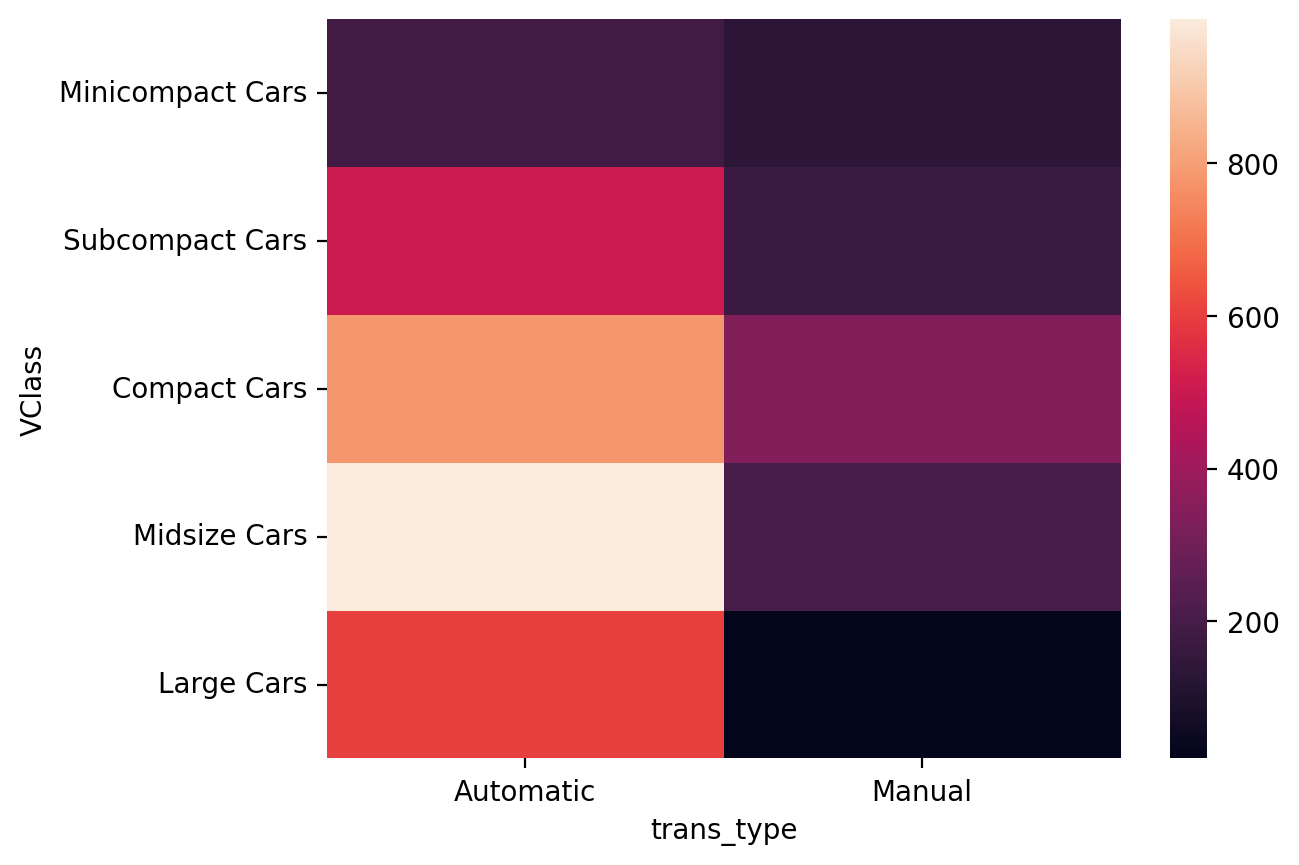

In [22]:
sns.heatmap(ct_counts);

The heatmap shows the exact same information as the clustered bar chart but plotting them this way may make it easier to see certain relationships.

### Flipping the x and y axis

In [29]:
ct_counts = df.groupby(['VClass', 'trans_type'],observed=False).size()
ct_counts

ct_counts = ct_counts.reset_index(name='count')
ct_counts

#Same first two steps as above

ct_counts = ct_counts.pivot(index='trans_type', columns='VClass', values='count')
ct_counts

VClass,Minicompact Cars,Subcompact Cars,Compact Cars,Midsize Cars,Large Cars
trans_type,,,,,
Automatic,188,502,784,989,605
Manual,133,171,338,199,20


''

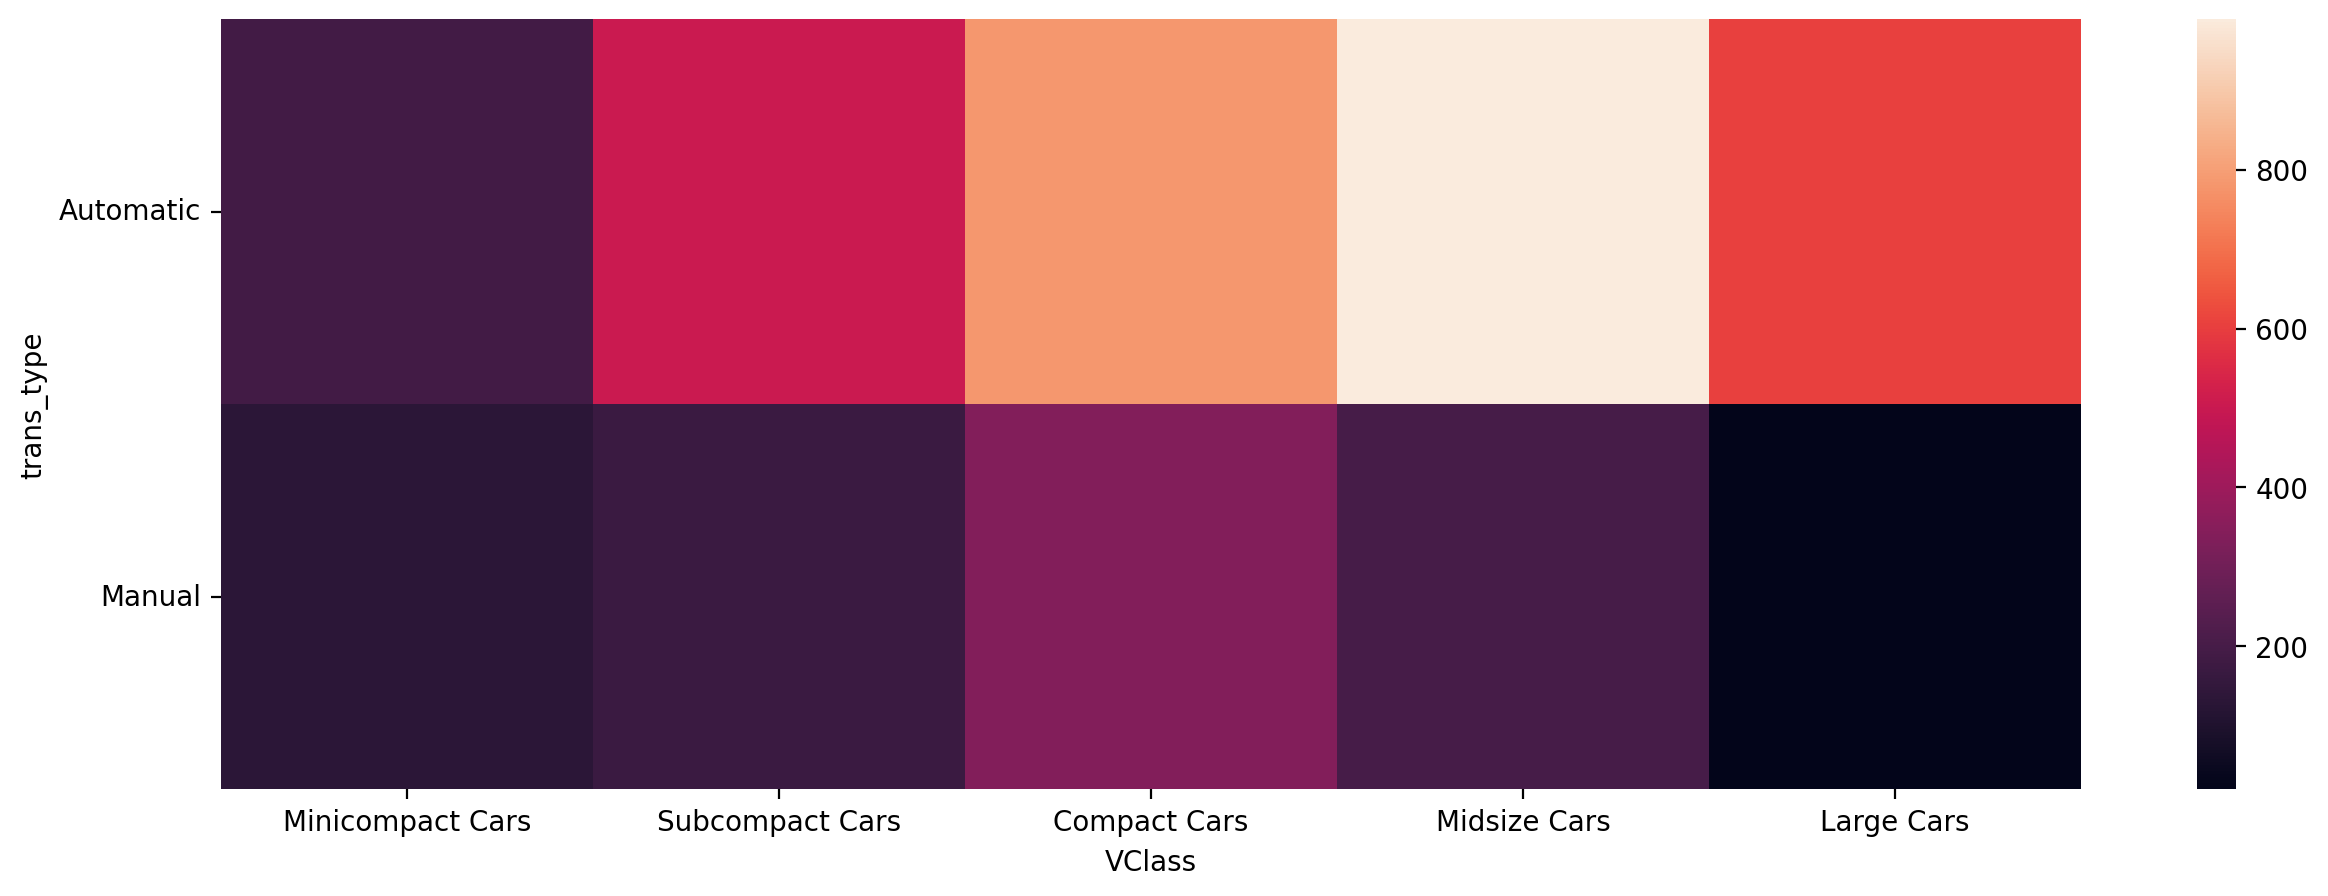

In [36]:
plt.figure(figsize=(15,5))

sns.heatmap(ct_counts)
plt.yticks(rotation=0) 
;

# Example 3: Addtional Variation

''

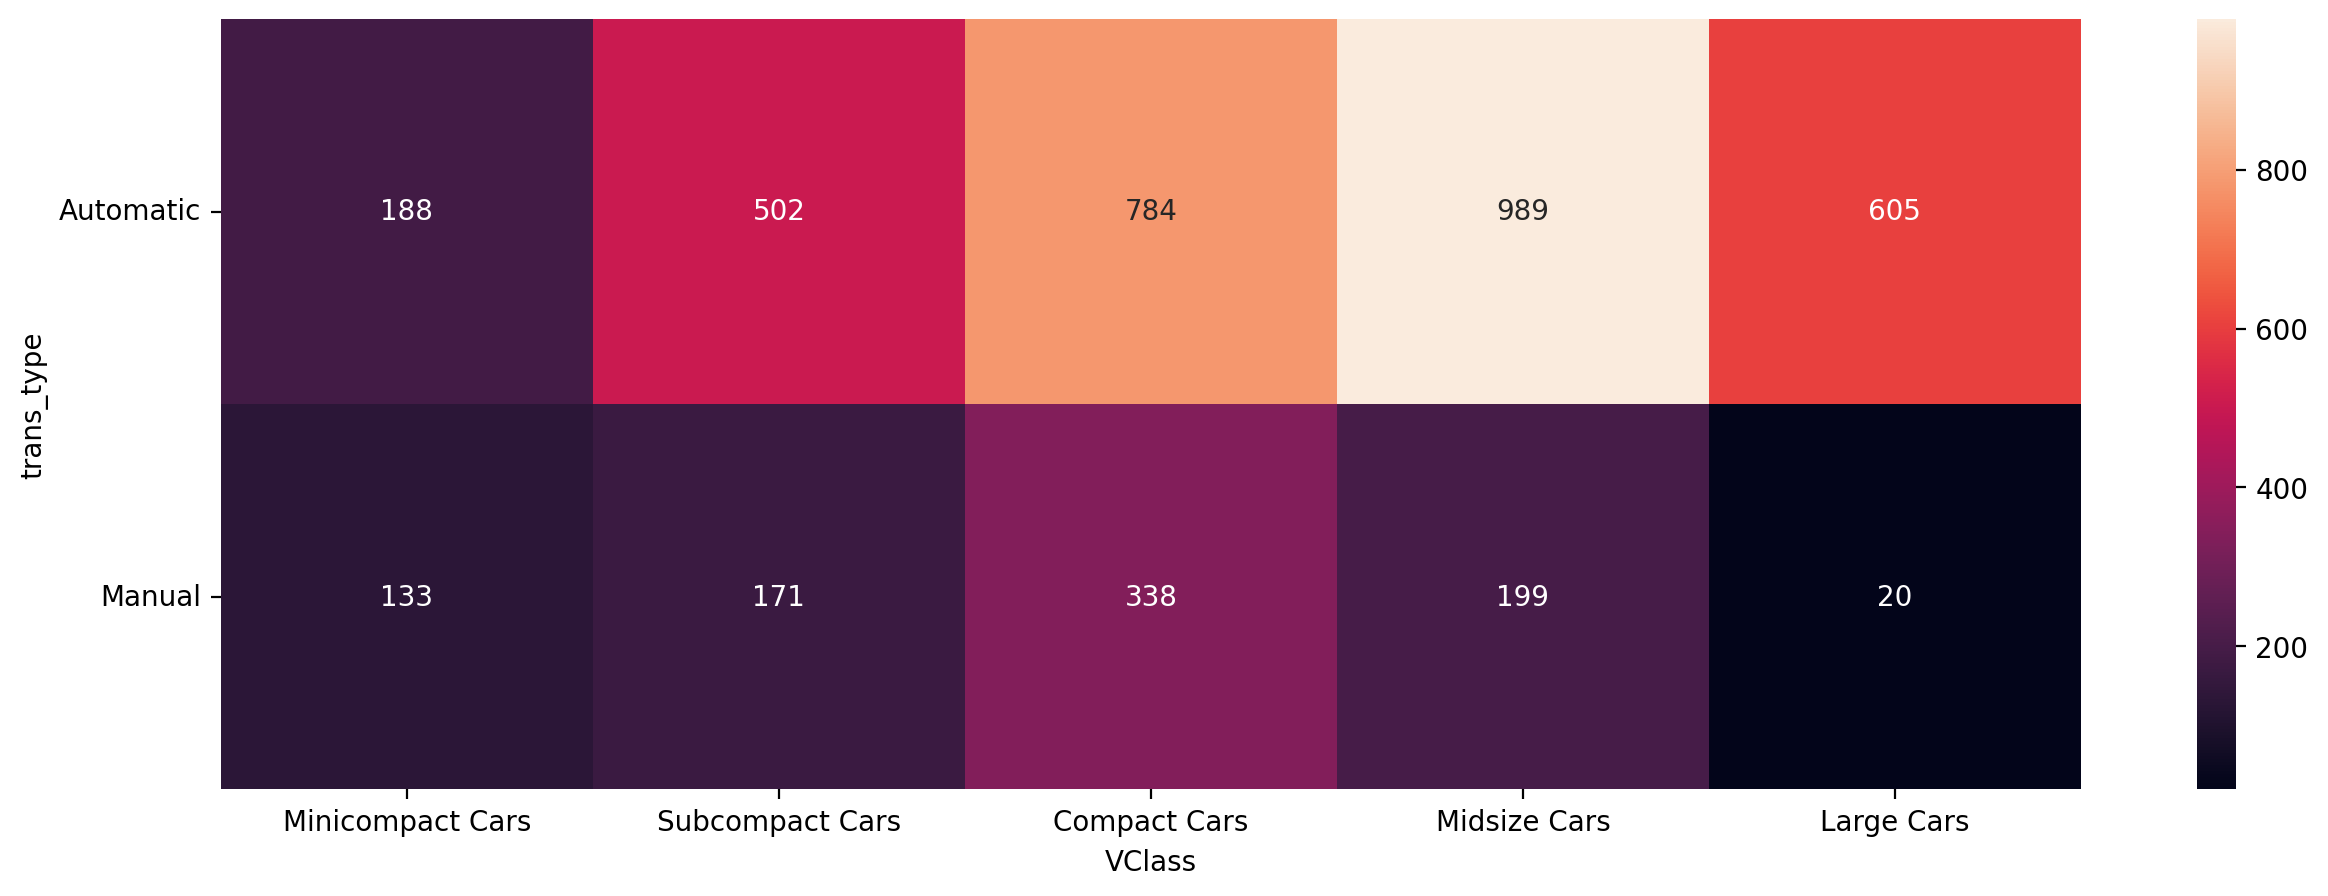

In [40]:
plt.figure(figsize=(15,5))

sns.heatmap(ct_counts,annot=True, fmt='d')# fmt='d' makes sure annotations are formated as integers instead of a float
plt.yticks(rotation=0)                    # fmt='0.f' can be used be used for cells with no counts to show NaN values.
;